# 电商用户行为预测实战

In [1]:
# 1. 数据集介绍
# https://tianchi.aliyun.com/dataset/dataDetail?dataId=46
# Reference https://blog.csdn.net/weixin_45666566/article/details/115050136

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
data = pd.read_csv('/Users/DanDan/Downloads/user.csv')

In [4]:
data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   behavior_type  int64 
 3   user_geohash   object
 4   item_category  int64 
 5   time           object
dtypes: int64(4), object(2)
memory usage: 561.1+ MB


In [6]:
data.describe()

,user_id,item_id,behavior_type,item_category
count,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07
mean,7.170732e+07,2.023084e+08,1.105271e+00,6.846162e+03
std,4.122920e+07,1.167397e+08,4.572662e-01,3.809922e+03
min,4.913000e+03,6.400000e+01,1.000000e+00,2.000000e+00
25%,3.584965e+07,1.014130e+08,1.000000e+00,3.721000e+03
50%,7.292804e+07,2.021359e+08,1.000000e+00,6.209000e+03
75%,1.073774e+08,3.035405e+08,1.000000e+00,1.029000e+04
max,1.424559e+08,4.045625e+08,4.000000e+00,1.408000e+04


In [7]:
data.time.sort_values()

1505077     2014-11-18 00
8686537     2014-11-18 00
4035788     2014-11-18 00
10113411    2014-11-18 00
2936757     2014-11-18 00
                ...      
5241608     2014-12-18 23
10296029    2014-12-18 23
8527264     2014-12-18 23
6263497     2014-12-18 23
9200479     2014-12-18 23
Name: time, Length: 12256906, dtype: object

In [54]:
# AARRR
# 获取
# 激活
# 留存
# 收入
# 传播

In [8]:
data.isnull().count()

user_id          12256906
item_id          12256906
behavior_type    12256906
user_geohash     12256906
item_category    12256906
time             12256906
dtype: int64

挖掘

In [9]:
df = data.drop('user_geohash', axis = 1)

In [10]:
behavior = {1: 'pv', 2: 'collect', 3:'cart', 4: 'buy'}
df['behavior_type'] = df['behavior_type'].map(lambda x: behavior[x])

In [11]:
df['behavior_type'].unique()

array(['pv', 'cart', 'collect', 'buy'], dtype=object)

In [12]:
df.head()

,user_id,item_id,behavior_type,item_category,time
0,98047837,232431562,pv,4245,2014-12-06 02
1,97726136,383583590,pv,5894,2014-12-09 20
2,98607707,64749712,pv,2883,2014-12-18 11
3,98662432,320593836,pv,6562,2014-12-06 10
4,98145908,290208520,pv,13926,2014-12-16 21


In [13]:
# 优化时间序列 time --> time date week

df['date'] = df.time.map(lambda x: ([i for i in x.split()][0]))
df['time'] = df.time.map(lambda x: ([i for i in x.split()][1]))

In [14]:
# 转化时间格式

df['date'] = pd.to_datetime(df['date'])
df['time'] = df['time'].astype(int)
df['week'] = [i.weekday() for i in df['date']]

In [15]:
df.head()

,user_id,item_id,behavior_type,item_category,time,date,week
0,98047837,232431562,pv,4245,2,2014-12-06,5
1,97726136,383583590,pv,5894,20,2014-12-09,1
2,98607707,64749712,pv,2883,11,2014-12-18,3
3,98662432,320593836,pv,6562,10,2014-12-06,5
4,98145908,290208520,pv,13926,21,2014-12-16,1


数据分析与展示

In [17]:
# 用户流量分析

In [18]:
aa = df.groupby(['behavior_type'])['user_id'].count()

In [19]:
aa

behavior_type
buy          120205
cart         343564
collect      242556
pv         11550581
Name: user_id, dtype: int64

In [20]:
bb = aa['pv']

In [21]:
df.groupby(['user_id']).count().shape

(10000, 6)

In [22]:
df.groupby(['date']).count()

,user_id,item_id,behavior_type,item_category,time,week
date,,,,,,
2014-11-18,366701,366701,366701,366701,366701,366701
2014-11-19,358823,358823,358823,358823,358823,358823
2014-11-20,353429,353429,353429,353429,353429,353429
2014-11-21,333104,333104,333104,333104,333104,333104
2014-11-22,361355,361355,361355,361355,361355,361355
2014-11-23,382702,382702,382702,382702,382702,382702
2014-11-24,378342,378342,378342,378342,378342,378342
2014-11-25,370239,370239,370239,370239,370239,370239
2014-11-26,360896,360896,360896,360896,360896,360896


(array([16391., 16395., 16399., 16403., 16405., 16409., 16413., 16417.,
        16421.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

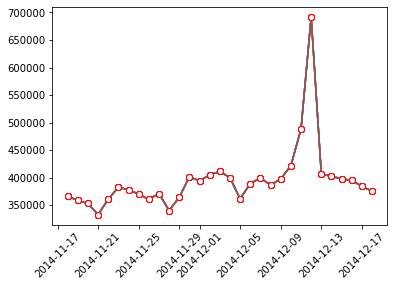

In [23]:
abc = df.groupby(['date']).count()
plt.plot(abc,marker ='o', mec='r', mfc='w')
plt.xticks(rotation=45)

In [24]:
pv_ttl = df.groupby(['behavior_type']).count()
pv_mean = round(pv_ttl.loc['pv']['user_id']/9, 2)
print('total visit', pv_ttl.loc['pv']['user_id'])
print('day average visit', pv_mean)

total visit 11550581
day average visit 1283397.89


In [25]:
pv_day = df.groupby(by = ['behavior_type', 'date']).count()
pv_day.loc['pv']['user_id']

date
2014-11-18    345855
2014-11-19    337870
2014-11-20    332792
2014-11-21    314572
2014-11-22    340563
2014-11-23    361221
2014-11-24    357192
2014-11-25    349392
2014-11-26    340621
2014-11-27    350040
2014-11-28    321813
2014-11-29    344127
2014-11-30    379439
2014-12-01    372095
2014-12-02    382052
2014-12-03    387497
2014-12-04    376307
2014-12-05    340976
2014-12-06    367126
2014-12-07    376596
2014-12-08    364097
2014-12-09    374261
2014-12-10    397661
2014-12-11    460329
2014-12-12    641507
2014-12-13    385337
2014-12-14    380717
2014-12-15    376624
2014-12-16    373399
2014-12-17    363757
2014-12-18    354746
Name: user_id, dtype: int64

In [26]:
# daily pv increase rate
for date in range(30):
    daily_i = pv_day.loc['pv']['user_id'][date +1] - pv_day.loc['pv']['user_id'][date]
    daily_r = round(daily_i / pv_day.loc['pv']['user_id'][date]*100, 2)
    print(pv_day.loc['pv'].index[date +1].strftime('%Y-%m-%d'), 'compared to previous pv', daily_i, 'daily pv increase rate', daily_r, '%')

2014-11-19 compared to previous pv -7985 daily pv increase rate -2.31 %
2014-11-20 compared to previous pv -5078 daily pv increase rate -1.5 %
2014-11-21 compared to previous pv -18220 daily pv increase rate -5.47 %
2014-11-22 compared to previous pv 25991 daily pv increase rate 8.26 %
2014-11-23 compared to previous pv 20658 daily pv increase rate 6.07 %
2014-11-24 compared to previous pv -4029 daily pv increase rate -1.12 %
2014-11-25 compared to previous pv -7800 daily pv increase rate -2.18 %
2014-11-26 compared to previous pv -8771 daily pv increase rate -2.51 %
2014-11-27 compared to previous pv 9419 daily pv increase rate 2.77 %
2014-11-28 compared to previous pv -28227 daily pv increase rate -8.06 %
2014-11-29 compared to previous pv 22314 daily pv increase rate 6.93 %
2014-11-30 compared to previous pv 35312 daily pv increase rate 10.26 %
2014-12-01 compared to previous pv -7344 daily pv increase rate -1.94 %
2014-12-02 compared to previous pv 9957 daily pv increase rate 2.68 

用户消费行为分析

In [27]:
#1. 时间维度分析用户消费行为习惯
# 用户四种行为
pv_data = df[df['behavior_type'] == 'pv']
cart_data = df[df['behavior_type'] == 'cart']
collect_data = df[df['behavior_type'] == 'collect']
buy_data = df[df['behavior_type'] == 'buy']

# 每个time四种行为各自uv
a = pv_data.groupby(['time'])['user_id'].nunique()
b = cart_data.groupby(['time'])['user_id'].nunique()
c = collect_data.groupby(['time'])['user_id'].nunique()
d = buy_data.groupby(['time'])['user_id'].nunique()

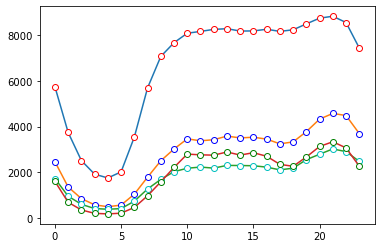

In [28]:
#每天不同时刻uv数
plt.plot(a, marker= 'o', mec= 'r' , mfc = 'w')
plt.plot(b, marker= 'o', mec= 'b' , mfc = 'w')
plt.plot(c, marker= 'o', mec= 'c' , mfc = 'w')
plt.plot(d, marker= 'o', mec= 'g' , mfc = 'w')

In [29]:
# 每week时刻四种行为各自uv
e = pv_data.groupby(['week'])['user_id'].nunique()
f = cart_data.groupby(['week'])['user_id'].nunique()
g = collect_data.groupby(['week'])['user_id'].nunique()
k = buy_data.groupby(['week'])['user_id'].nunique()

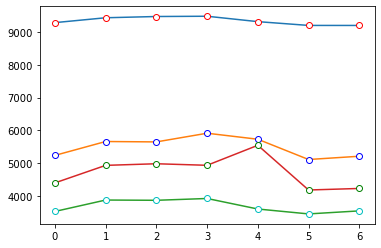

In [30]:
#每week不同时刻uv数
plt.plot(e, marker= 'o', mec= 'r' , mfc = 'w')
plt.plot(f, marker= 'o', mec= 'b' , mfc = 'w')
plt.plot(g, marker= 'o', mec= 'c' , mfc = 'w')
plt.plot(k, marker= 'o', mec= 'g' , mfc = 'w')

In [31]:
#2. 用户行为转换分析
# 用户发生四种行为，每个行为的总和
behavior_funnel = df['behavior_type'].value_counts().reset_index()
behavior_funnel.columns = ['yonghuxingwei','fangwenliang']

# 求出单一环节转化率
temp1 = np.array(behavior_funnel['fangwenliang'][1:])
temp2 = np.array(behavior_funnel['fangwenliang'][0:-1])
single_convs = list(temp1 / temp2)

single_convs.insert(0, 1)
single_convs = [round(x, 4) for x in single_convs]
behavior_funnel['单一环节转化率'] = single_convs

# 求出总体的转换率
temp3 = np.array(behavior_funnel['fangwenliang'])
temp4 = np.ones(len(behavior_funnel['fangwenliang'])) * behavior_funnel['fangwenliang'][0]

total_convs = (temp3 / temp4).tolist()
total_convs = [round(x, 4) for x in total_convs]
behavior_funnel['总体转化率'] = total_convs

In [32]:
!pip install pyecharts==1.9

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [33]:
import pyecharts.options as opts
from pyecharts.charts import Funnel

attrs = behavior_funnel['yonghuxingwei'].tolist()
values = (np.array(behavior_funnel['总体转化率'])*100).tolist()

d = [[attrs[i], values[i]] for i in range(len(attrs))]

In [34]:
funnel = (Funnel(init_opts = opts.InitOpts(width='800px', height='600px')).add(
    series_name='',data_pair=d,gap=2, label_opts=opts.LabelOpts(is_show=True,
    position='inside',formatter='{c}%'),itemstyle_opts=opts.ItemStyleOpts(border_color='#fff',border_width=1),
    ).set_global_opts(title_opts=opts.TitleOpts(title='youhuxingwei总体转化率')))

funnel.render_notebook()

In [35]:
# uv convert ration
pv = pv_data.groupby('user_id').count().count()
cart = cart_data.groupby('user_id').count().count()
collect = collect_data.groupby('user_id').count().count()
buy = buy_data.groupby('user_id').count().count()

In [36]:
pv, cart, collect, buy

(item_id          10000
 behavior_type    10000
 item_category    10000
 time             10000
 date             10000
 week             10000
 dtype: int64,
 item_id          8614
 behavior_type    8614
 item_category    8614
 time             8614
 date             8614
 week             8614
 dtype: int64,
 item_id          6730
 behavior_type    6730
 item_category    6730
 time             6730
 date             6730
 week             6730
 dtype: int64,
 item_id          8886
 behavior_type    8886
 item_category    8886
 time             8886
 date             8886
 week             8886
 dtype: int64)

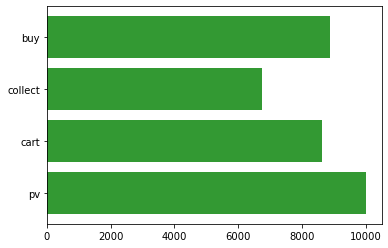

In [37]:
import matplotlib


count = [10000, 8614, 6730, 8886]
plt.barh(range(4), count, height=0.8, color='green', alpha=0.8)
plt.yticks(range(4), ['pv', 'cart', 'collect', 'buy'])

    
plt.show()


In [38]:
# 3. 月复购率
#访问用户数

pv_data.groupby('user_id').count().count()
user_buy = df[df['behavior_type'] == 'buy'].groupby('user_id').count()

#有购买记录的用户数
user_buy_count = user_buy.count()

#购买次数超过3次的用户
user_buy_number = user_buy[user_buy['behavior_type'] >= 3].count()

In [39]:
user_buy

,item_id,behavior_type,item_category,time,date,week
user_id,,,,,,
4913,6,6,6,6,6,6
6118,1,1,1,1,1,1
7528,6,6,6,6,6,6
7591,21,21,21,21,21,21
12645,8,8,8,8,8,8
...,...,...,...,...,...,...
142376113,1,1,1,1,1,1
142412247,12,12,12,12,12,12
142430177,5,5,5,5,5,5


In [40]:
# 复购率

repurchase_rate = user_buy_number / user_buy_count
repurchase_rate

item_id          0.841211
behavior_type    0.841211
item_category    0.841211
time             0.841211
date             0.841211
week             0.841211
dtype: float64

In [41]:
# 4 用户购买和不购买的路径分析
# 购买的方式
# 四种行为按照商品进行分组

item_pv = pv_data.groupby('item_id')['behavior_type'].count().reset_index()
item_cart = cart_data.groupby('item_id')['behavior_type'].count().reset_index()
item_collect = collect_data.groupby('item_id')['behavior_type'].count().reset_index()
item_buy = buy_data.groupby('item_id')['behavior_type'].count().reset_index()


In [42]:
# 点击 》  购买
pv_buy = pd.merge(item_pv, item_buy, on='item_id', how='inner').count()


# 点击 》 加入购物车 〉 购买

pv_cart= pd.merge(item_pv, item_cart, on='item_id', how='inner')
pv_cart_buy= pd.merge(pv_cart, item_buy, on='item_id', how='inner').count()


# 点击 》 收藏 〉 购买

pv_collect = pd.merge(item_pv, item_collect, on='item_id', how='inner')
pv_collect_buy = pd.merge(pv_collect, item_buy, on='item_id', how='inner').count()


# 点击 》 加入购物车 》 收藏 》 购买

pv_cart_collect = pd.merge(pv_cart, item_collect, on='item_id', how='inner')
pv_cart_collect_buy = pd.merge(pv_cart_collect, item_buy, on='item_id', how='inner').count()


In [ ]:
# 不购买路径分析

# 不购买行为按照商品分组

# 点击 》 不购买

# 点击 》 购物车 〉 不购买

# 点击 》 购物车 》 收藏 〉 不购买

商品销售情况分析

In [43]:
# 商品总数

df.groupby('item_id').count().shape

(2876947, 6)

In [44]:
# 销售商品总数
item_frequency = df.groupby(['item_id'],as_index=False).count()
item_frequency.count()

item_id          2876947
user_id          2876947
behavior_type    2876947
item_category    2876947
time             2876947
date             2876947
week             2876947
dtype: int64

In [45]:
# 销售两次或以上商品总数
item_frequency[item_frequency['behavior_type'] >=2].count()


item_id          2153352
user_id          2153352
behavior_type    2153352
item_category    2153352
time             2153352
date             2153352
week             2153352
dtype: int64

In [46]:
# pv前十的商品

pv_data.groupby('item_id').count().sort_values(by = 'user_id')[:10]

,user_id,behavior_type,item_category,time,date,week
item_id,,,,,,
89184189,1,1,1,1,1,1
80566870,1,1,1,1,1,1
219898660,1,1,1,1,1,1
302367891,1,1,1,1,1,1
219899767,1,1,1,1,1,1
80567885,1,1,1,1,1,1
302367051,1,1,1,1,1,1
80568308,1,1,1,1,1,1
302366395,1,1,1,1,1,1


特征工程

In [ ]:
'''
1. 基本统计类特征
a 截止到最后一天的累积点击
b 同样的特征对用户的行为（collect, cart, buy)进行统计
c 截止到最后一天，用户对评判进行访问的次数，收藏的次数，购物车的统计
d 用户第一次对品牌进行访问（收藏，购物车，购买）到最后一次访问的时间间隔

2. 比值类特征
a 购买某次品牌次数/总购买书
b 对该品牌的总的点次数/访问次数

'''

In [ ]:
# background:
# ecommerce behavior: pv, cart, collect, buy
# analyze customer behavior, explore the online shopping rule

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv('/Users/DanDan/Downloads/user.csv')

In [3]:
data.shape

(12256906, 6)

In [5]:
# resample 5% of the whole data 
df = data.sample(frac=0.05, random_state=42, axis=0)

In [6]:
df.shape

(612845, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612845 entries, 9125647 to 11328791
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        612845 non-null  int64 
 1   item_id        612845 non-null  int64 
 2   behavior_type  612845 non-null  int64 
 3   user_geohash   195667 non-null  object
 4   item_category  612845 non-null  int64 
 5   time           612845 non-null  object
dtypes: int64(4), object(2)
memory usage: 32.7+ MB


In [8]:
df.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
9125647,110297710,355299199,1,99pj91l,56,2014-11-19 20
6241424,37844114,29685066,4,NaN,9909,2014-11-29 09
1282164,42719621,326606205,1,NaN,10049,2014-12-06 23
10386602,83813302,281220728,1,95ovcrj,5027,2014-12-17 09
5968289,56245076,97710618,1,NaN,1183,2014-12-15 08


In [9]:
# remove unneccessary columns
del df['user_geohash']

In [11]:
time = pd.to_datetime(df['time'])

In [12]:
# convert the time to hour, weekday, date
df['hour'] = time.dt.hour
df['weekday'] = time.dt.weekday
df['date'] = time.dt.date

In [13]:
# customer behavior
behavior = {1:'pv', 2:'cart', 3:'collect', 4:'buy'}
df['behavior_type'] = df['behavior_type'].map(lambda x: behavior[x])
df.head()

,user_id,item_id,behavior_type,item_category,time,hour,weekday,date
9125647,110297710,355299199,pv,56,2014-11-19 20,20,2,2014-11-19
6241424,37844114,29685066,buy,9909,2014-11-29 09,9,5,2014-11-29
1282164,42719621,326606205,pv,10049,2014-12-06 23,23,5,2014-12-06
10386602,83813302,281220728,pv,5027,2014-12-17 09,9,2,2014-12-17
5968289,56245076,97710618,pv,1183,2014-12-15 08,8,0,2014-12-15


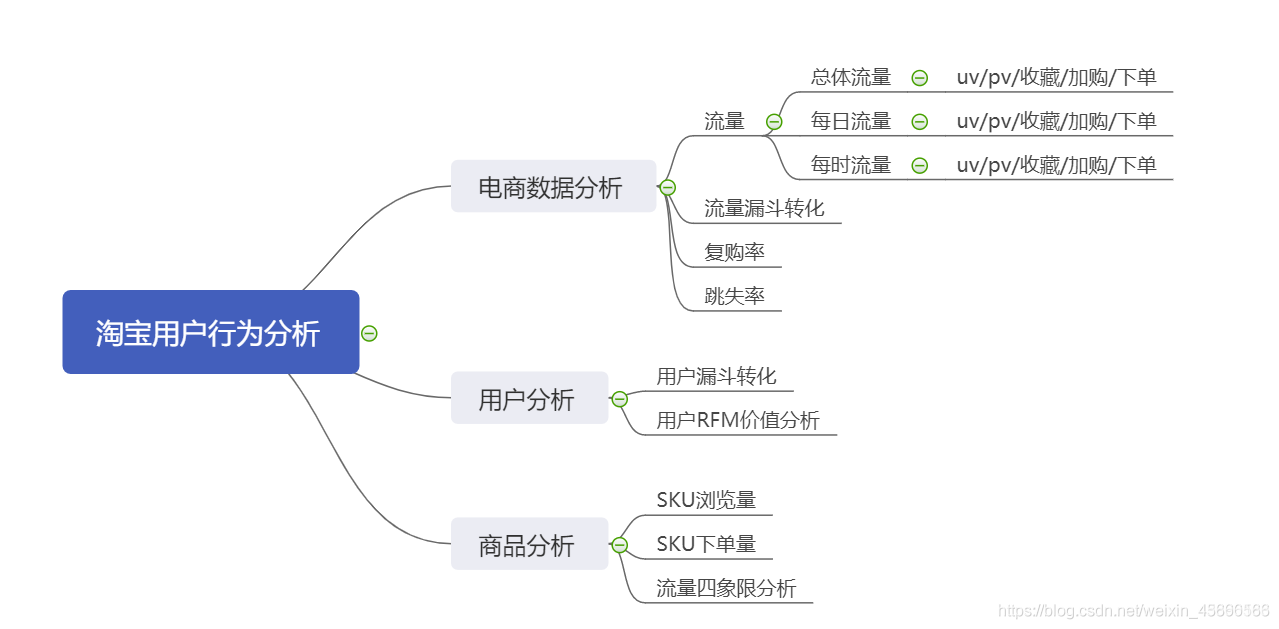

# 电商数据分析

In [ ]:
# 1. 流量分析

In [49]:
# 1.1总体流量分析
# 总体访问量，收藏，加购，下单
total_browse = df.groupby(['behavior_type']).size()
pv = total_browse[3]

In [50]:
# 总访客数
uv = df['user_id'].nunique()

In [51]:
uv

9870

In [52]:
#消费用户
user_pay = df[df['behavior_type'] =='buy']['user_id'].unique()

In [53]:
len(user_pay)

3455

In [54]:
# 日均访问量
pv_per_day = pv/df['date'].nunique()

In [55]:
pv_per_day

18644.774193548386

In [56]:
# 人均访问量
pv_per_user = pv/ uv

In [57]:
pv_per_user

58.56008105369808

In [60]:
df[df['user_id'].isin(user_pay)]['behavior_type'].value_counts()

pv         298946
collect     10453
cart         6005
buy          5862
Name: behavior_type, dtype: int64

In [ ]:
# 消费用户访问量
pv_pay = df[df['user_id'].isin(user_pay)]['behavior_type'].value_counts().pv

In [67]:
# 消费用户占比
user_pay_rate = len(user_pay) / uv

In [68]:
# 消费用户访问量占比
pv_pay_rate = pv_pay / pv

In [69]:
# 消费用户人均访问量
pv_per_buy_user = pv_pay / len(user_pay)

In [72]:
# 每日流量分析
# 每日流量
day_browse = df.groupby(['date', 'behavior_type']).size().unstack()

In [76]:
# 每日UV
day_uv = df.groupby('date')['user_id'].apply(lambda x: x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
print(day_uv)

          date    uv
0   2014-11-18  4274
1   2014-11-19  4236
2   2014-11-20  4174
3   2014-11-21  4087
4   2014-11-22  4093
5   2014-11-23  4315
6   2014-11-24  4341
7   2014-11-25  4217
8   2014-11-26  4234
9   2014-11-27  4185
10  2014-11-28  4084
11  2014-11-29  4140
12  2014-11-30  4420
13  2014-12-01  4428
14  2014-12-02  4521
15  2014-12-03  4540
16  2014-12-04  4455
17  2014-12-05  4286
18  2014-12-06  4313
19  2014-12-07  4387
20  2014-12-08  4416
21  2014-12-09  4503
22  2014-12-10  4587
23  2014-12-11  4930
24  2014-12-12  5867
25  2014-12-13  4639
26  2014-12-14  4580
27  2014-12-15  4581
28  2014-12-16  4554
29  2014-12-17  4490
30  2014-12-18  4441


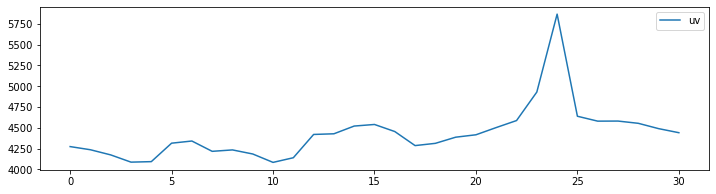

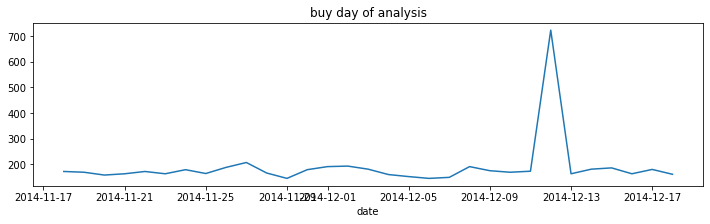

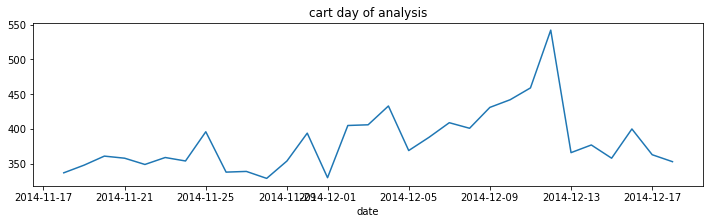

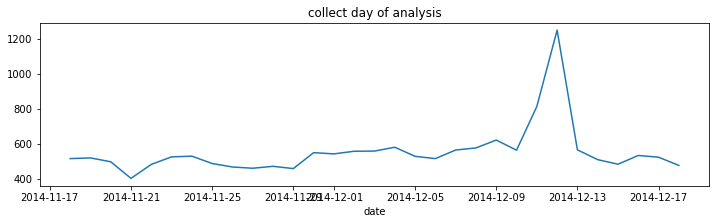

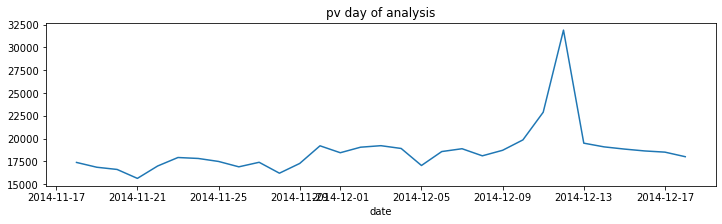

In [78]:
day_uv.plot(figsize=(12,3))
for i in day_browse.columns:
    plt.figure()
    ax=day_browse[i].plot(figsize=(12,3))
    ax.set_title(i+' '+'day of analysis')

In [79]:
# 每时流量分析
hour_browse = df.groupby(['hour','behavior_type']).size().unstack()
#每时uv
hour_uv = df.groupby(['hour'])['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})

<AxesSubplot:>

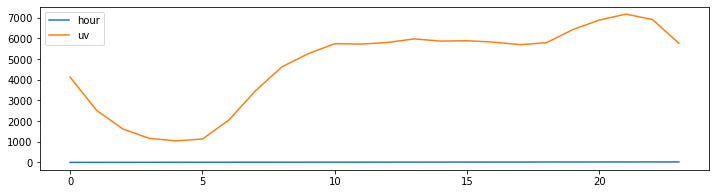

In [81]:
hour_uv.plot(figsize = (12, 3))

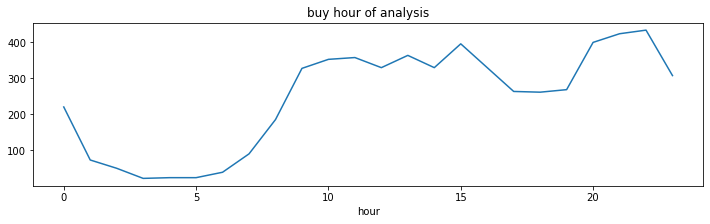

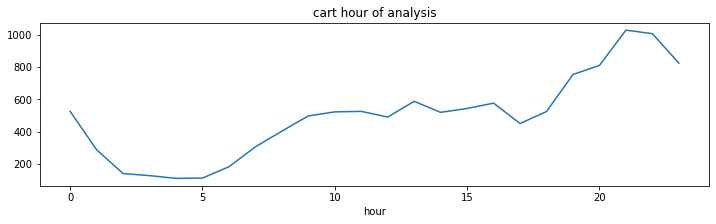

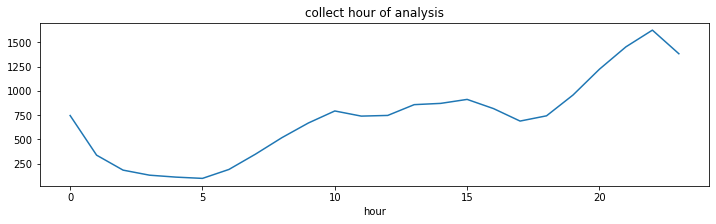

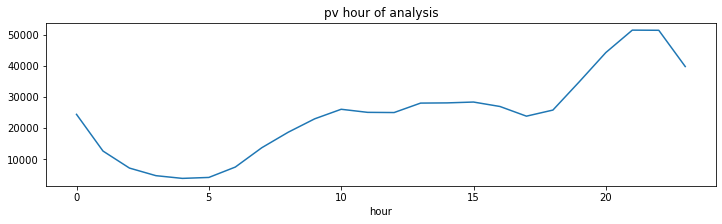

In [82]:
for i in hour_browse.columns:
    plt.figure()
    ax=hour_browse[i].plot(figsize=(12,3))
    ax.set_title(i+' '+'hour of analysis')

2. 行为流量漏斗转化分析

In [84]:
pv_to_cart_collect = (total_browse.cart + total_browse.collect) / total_browse.pv * 100
cart_collect_to_buy = total_browse.buy / (total_browse.cart + total_browse.collect) * 100
pv_to_buy = total_browse.buy/ total_browse.pv * 100

In [85]:
df.head()

,user_id,item_id,behavior_type,item_category,time,hour,weekday,date
9125647,110297710,355299199,pv,56,2014-11-19 20,20,2,2014-11-19
6241424,37844114,29685066,buy,9909,2014-11-29 09,9,5,2014-11-29
1282164,42719621,326606205,pv,10049,2014-12-06 23,23,5,2014-12-06
10386602,83813302,281220728,pv,5027,2014-12-17 09,9,2,2014-12-17
5968289,56245076,97710618,pv,1183,2014-12-15 08,8,0,2014-12-15


In [93]:
df_con = df[['user_id', 'item_id', 'time', 'behavior_type']]

loudou = df_con['behavior_type'].value_counts().reset_index()
loudou.loc[1, :] = 'collect+cart', loudou.loc[1, 'behavior_type'] + loudou.loc[2, 'behavior_type']
loudou.drop(index=2, inplace=True)
orders = [0,1,2]
loudou.index=orders

In [94]:
loudou

,index,behavior_type
0,pv,577988
1,collect+cart,28995
2,buy,5862


In [95]:
jieduan0 = list(loudou['behavior_type'])

In [97]:
jieduan1=[]
for j in range(len(jieduan0)):
    if j==0:
        jieduan1.append(jieduan0[j])
    else:
        jieduan1.append(jieduan0[j-1])
        
loudou['行为阶段1'] = jieduan1

loudou['转化率']= loudou['behavior_type']/  loudou['行为阶段1']
loudou

,index,behavior_type,行为阶段1,转化率
0,pv,577988,577988,1.000000
1,collect+cart,28995,577988,0.050165
2,buy,5862,28995,0.202173


In [100]:
# 复购率
# 复购率，指消费者对该品牌产品的重复购买次数，重复购买率越多，则反映出消费者对品牌的忠诚度高
# 复购率 = 重复购买客户数量 / 客户样本数量

repurchase_rate = df[df.behavior_type=='buy'].groupby('user_id')['date'].apply(lambda x: len(x.unique())).rename('repurchase_count')
repurchase_rate[repurchase_rate>=2].count() / repurchase_rate.count()

0.3337192474674385

In [111]:
# 跳失率
#跳失率，显示客户通过相应入口进入，只访问了一个页面就离开的访问次数 占该入口总访问次数的比例
attrition_rates = sum(df.groupby('user_id')['behavior_type'].count()==1) / (df['user_id'].nunique())
attrition_rates

0.015197568389057751

用户分析

In [118]:
# 用户行为数据统计
user_browse = df.groupby(['user_id', 'behavior_type']).size().unstack()
user_browse

behavior_type,buy,cart,collect,pv
user_id,,,,
4913,NaN,NaN,4.0,78.0
6118,NaN,NaN,NaN,9.0
7528,2.0,NaN,NaN,7.0
7591,NaN,NaN,NaN,44.0
12645,NaN,NaN,1.0,14.0
...,...,...,...,...
142376113,NaN,NaN,1.0,16.0
142412247,2.0,NaN,NaN,19.0
142430177,NaN,2.0,NaN,60.0


In [114]:
user_browse = pd.crosstab(df['user_id'], df['behavior_type'])
user_browse

behavior_type,buy,cart,collect,pv
user_id,,,,
4913,0,0,4,78
6118,0,0,0,9
7528,2,0,0,7
7591,0,0,0,44
12645,0,0,1,14
...,...,...,...,...
142376113,0,0,1,16
142412247,2,0,0,19
142430177,0,2,0,60


In [122]:
# 用户消费频次
# 前10用户消费，直方图，复购率
topbuyer10 = user_browse.sort_values(by='buy',ascending=False)[:10]
topbuyer10

behavior_type,buy,cart,collect,pv
user_id,,,,
122338823,48.0,NaN,45.0,484.0
123842164,27.0,5.0,24.0,557.0
51492142,18.0,16.0,29.0,413.0
56560718,13.0,18.0,18.0,252.0
22393155,12.0,1.0,14.0,175.0
65982317,10.0,NaN,11.0,143.0
124259296,9.0,NaN,12.0,105.0
122421140,9.0,NaN,12.0,107.0
35306096,9.0,4.0,32.0,145.0


In [124]:
topbuyer10.reset_index().style.bar(color='red', subset=['buy'])

behavior_type,user_id,buy,cart,collect,pv
0,122338823,48.000000,nan,45.000000,484.000000
1,123842164,27.000000,5.000000,24.000000,557.000000
2,51492142,18.000000,16.000000,29.000000,413.000000
3,56560718,13.000000,18.000000,18.000000,252.000000
4,22393155,12.000000,1.000000,14.000000,175.000000
5,65982317,10.000000,nan,11.000000,143.000000
6,124259296,9.000000,nan,12.000000,105.000000
7,122421140,9.000000,nan,12.000000,107.000000
8,35306096,9.000000,4.000000,32.000000,145.000000
9,475826,8.000000,11.000000,8.000000,305.000000


In [131]:
# 用户行为在时间维度的分布

# 日消费次数，日活跃人数，日消费人数，日消费人数占比，消费用户日人均消费次数
daily_active_user = df.groupby('date')['user_id'].nunique()

daily_buy_user = df[df['behavior_type'] == 'buy'].groupby('date')['user_id'].nunique()

proportion_of_buyer = daily_buy_user / daily_active_user

daily_buy_count = df[df['behavior_type'] == 'buy'].groupby('date')['behavior_type'].count()

consume_per_buyer = daily_buy_count / daily_buy_user

Text(0.5, 1.0, 'daily buyer ratio')

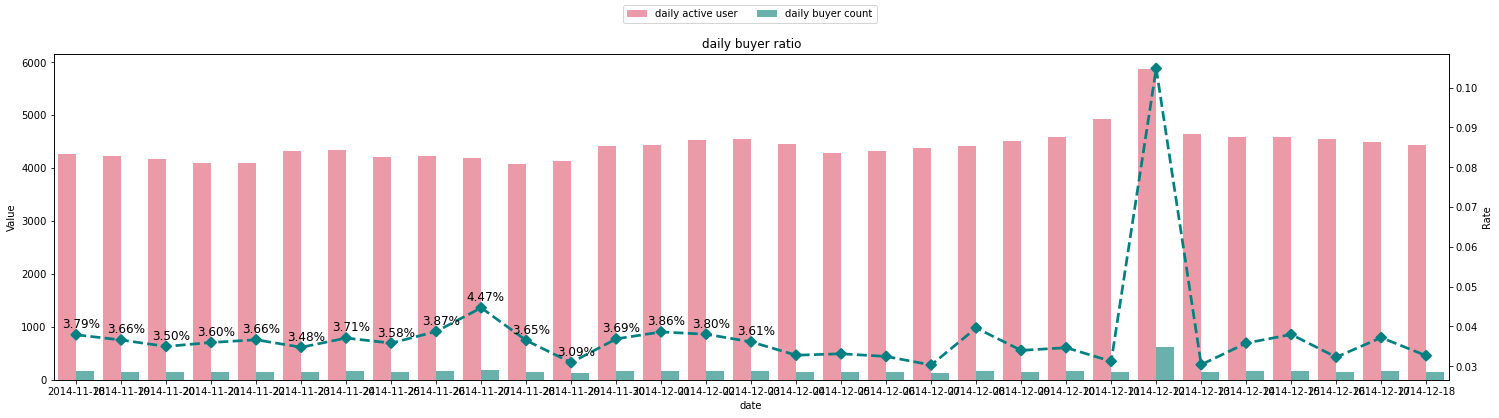

In [142]:
# 日消费人数占比可视化
 
# 柱状图数据
pob_bar = (pd.merge(daily_active_user,daily_buy_user,on='date').reset_index()
           .rename(columns={'user_id_x':'daily active user','user_id_y':'daily buyer count'})
           .set_index('date').stack().reset_index().rename(columns={'level_1':'Variable',0: 'Value'}))
# 线图数据
pob_line = proportion_of_buyer.reset_index().rename(columns={'user_id':'Rate'})
 
fig1 = plt.figure(figsize=[25,6])
ax1 = fig1.add_subplot(111)
ax2 = ax1.twinx()
 
sns.barplot(x='date', y='Value', hue='Variable', data=pob_bar, ax=ax1, alpha=0.8, palette='husl')
 
ax1.legend().set_title('')
ax1.legend().remove() 
 
sns.pointplot(pob_line['date'], pob_line['Rate'], ax=ax2,markers='D', linestyles='--',color='teal')
x=list(range(0,16))
for a,b in zip(x,pob_line['Rate']):
    plt.text(a+0.1, b+0.001, '%.2f%%'% (b*100), ha='center', va= 'bottom',fontsize=12)
 
fig1.legend(loc='upper center',ncol=2)
plt.title('daily buyer ratio')


Text(0.5, 1.0, 'daily buyer consume count')

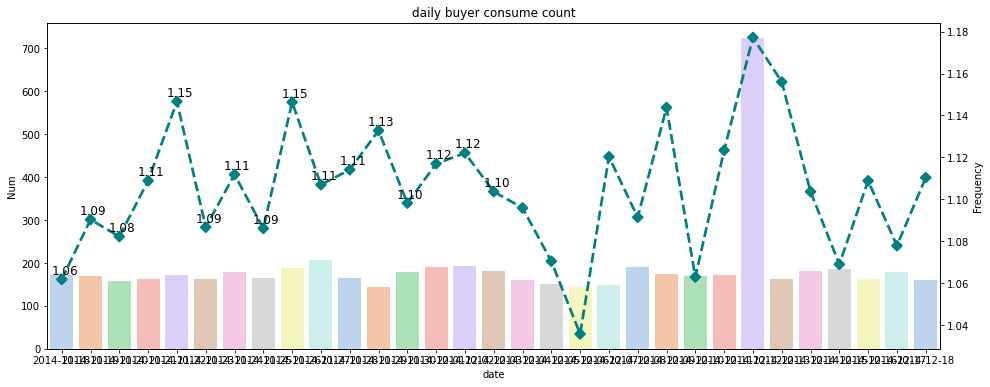

In [143]:
# 消费用户日人均消费次数可视化
 
# 柱状图数据
cpb_bar = (daily_buy_count.reset_index().rename(columns={'behavior_type':'Num'}))
# 线图数据
cpb_line = (consume_per_buyer.reset_index().rename(columns={0:'Frequency'}))
 
fig2 = plt.figure(figsize=[16,6])
ax3 = fig2.add_subplot(111)
ax4 = ax3.twinx()
 
sns.barplot(x='date', y='Num', data=cpb_bar, ax=ax3, alpha=0.8, palette='pastel')
sns.pointplot(cpb_line['date'], cpb_line['Frequency'], ax=ax4, markers='D', linestyles='--',color='teal')
 
x=list(range(0,16))
for a,b in zip(x,cpb_line['Frequency']):
    plt.text(a+0.1, b+0.001, '%.2f'% b, ha='center', va= 'bottom',fontsize=12)
plt.title('daily buyer consume count')

In [145]:
dau3_df=df.groupby(['date','user_id'])['behavior_type'].count().reset_index()
dau3_df=dau3_df[dau3_df['behavior_type'] >= 3]

In [146]:
# 每日高活跃用户数（每日操作数大于3次）
dau3_num=dau3_df.groupby('date')['user_id'].nunique()

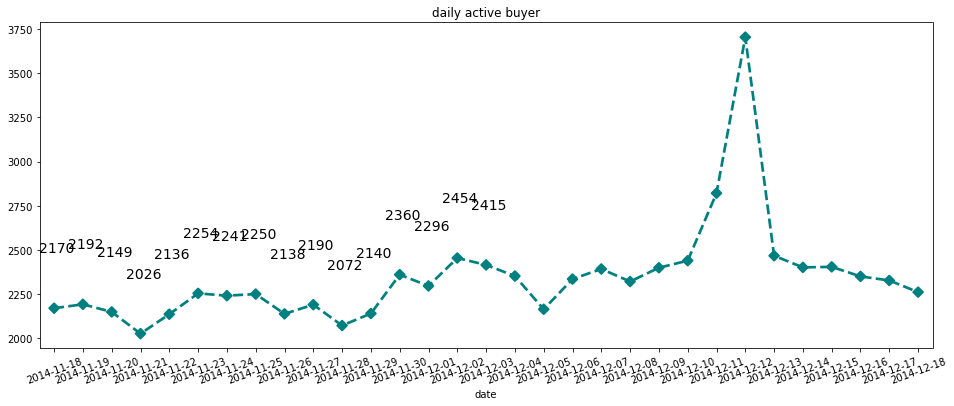

In [150]:
fig, ax = plt.subplots(figsize=[16,6])
sns.pointplot(dau3_num.index, dau3_num.values, markers='D', linestyles='--',color='teal')
x=list(range(0,16))
for a,b in zip(x,dau3_num.values):
    plt.text(a+0.1, b+300,'%i'% b, ha='center', va= 'bottom',fontsize=14)
plt.title('daily active buyer')
plt.xticks(rotation =20)
plt.show()

In [151]:
# 高活跃用户累计活跃天数分布
dau3_cumsum = dau3_df.groupby('user_id')['date'].count()

Text(0.5, 1.0, 'active buyer distribution by date')

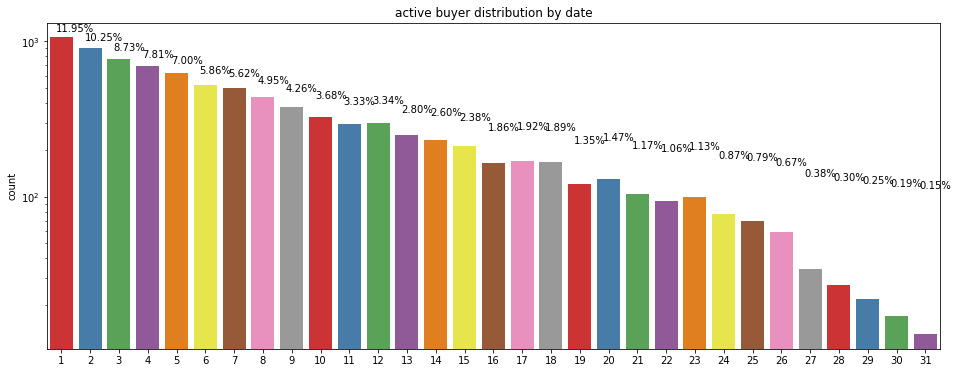

In [152]:
fig, ax = plt.subplots(figsize=[16,6])
ax.set_yscale("log")
sns.countplot(dau3_cumsum.values,palette='Set1')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(dau3_cumsum.values)), (p.get_x() + 0.2, p.get_height() + 100))
plt.title('active buyer distribution by date')

In [153]:
# 导入相关包
from pyecharts import options as opts
from pyecharts.charts import Funnel# 构建漏斗图
import math

In [154]:
df.head()

,user_id,item_id,behavior_type,item_category,time,hour,weekday,date
9125647,110297710,355299199,pv,56,2014-11-19 20,20,2,2014-11-19
6241424,37844114,29685066,buy,9909,2014-11-29 09,9,5,2014-11-29
1282164,42719621,326606205,pv,10049,2014-12-06 23,23,5,2014-12-06
10386602,83813302,281220728,pv,5027,2014-12-17 09,9,2,2014-12-17
5968289,56245076,97710618,pv,1183,2014-12-15 08,8,0,2014-12-15


In [155]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H')

In [156]:
df_con = df[['user_id', 'item_id', 'time', 'behavior_type']]

In [157]:
df_pv = df_con[df_con['behavior_type'] == 'pv']
df_cart = df_con[df_con['behavior_type'] == 'cart']
df_collect = df_con[df_con['behavior_type'] == 'collect']
df_buy = df_con[df_con['behavior_type'] == 'buy']

In [160]:
df_pv_uid = df_con[df_con['behavior_type'] =='pv']['user_id'].unique()
df_cart_uid = df_con[df_con['behavior_type'] =='cart']['user_id'].unique()
df_collect_uid = df_con[df_con['behavior_type'] =='collect']['user_id'].unique()
df_buy_uid = df_con[df_con['behavior_type'] =='buy']['user_id'].unique()

In [161]:
# 1. pv --> buy
collect_cart_list = set(df_collect_uid) | set(df_cart_uid)

In [163]:
pv_buy_df = pd.merge(left=df_pv, right=df_buy, how='inner', on=['user_id', 'item_id'],suffixes =('_pv', '_pay'))
pv_buy_df

,user_id,item_id,time_pv,behavior_type_pv,time_pay,behavior_type_pay
0,123848513,133816129,2014-12-11 15:00:00,pv,2014-12-12 10:00:00,buy
1,123848513,133816129,2014-12-12 10:00:00,pv,2014-12-12 10:00:00,buy
2,10437655,133558999,2014-11-24 13:00:00,pv,2014-11-24 15:00:00,buy
3,10437655,133558999,2014-12-18 15:00:00,pv,2014-11-24 15:00:00,buy
4,124926433,143822604,2014-11-30 12:00:00,pv,2014-11-25 16:00:00,buy
...,...,...,...,...,...,...
2774,28699943,288432379,2014-12-11 20:00:00,pv,2014-12-11 20:00:00,buy
2775,79472459,378352841,2014-12-02 20:00:00,pv,2014-12-02 20:00:00,buy
2776,63973702,389931404,2014-12-17 20:00:00,pv,2014-12-17 21:00:00,buy
2777,119084219,182143899,2014-12-06 00:00:00,pv,2014-12-09 22:00:00,buy


In [167]:
uv = df['user_id'].nunique()
pv_buy_num = pv_buy_df['user_id'].nunique()
pv_buy_data = pd.DataFrame({'type':['pv', 'buy'],'num':[uv, pv_buy_num]})
pv_buy_data['conversion_rates'] = pv_buy_data['num'] / pv_buy_data['num'][0]
print('pv-->buy',pv_buy_data['conversion_rates'][1])

pv-->buy 0.1636271529888551


In [168]:
attr1=list(pv_buy_data.type)
values1=list(pv_buy_data.conversion_rates)
data1=[[attr1[i], values1[i]] for i in range(len(attr1))]

In [169]:
# 用户行为转化漏斗可视化
 
pv_pay=(Funnel(opts.InitOpts(width="600px", height="300px"))
        .add(
            series_name="",
            data_pair=data1,
            gap=2,
            tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{b} : {c}%"),
            label_opts=opts.LabelOpts(is_show=True, position="inside"),
            itemstyle_opts=opts.ItemStyleOpts(border_color="#fff", border_width=1)
        )
        .set_global_opts(title_opts=opts.TitleOpts(title="用户行为转化漏斗图"))
       )
pv_pay.render_notebook()

In [171]:
#2. pv -->cart --> buy
pv_cart_df = pd.merge(left= df_pv, right=df_cart, how='inner', on=['user_id', 'item_id'])
pv_cart_df=pv_cart_df[~pv_cart_df['user_id'].isin(df_collect_uid)]


In [172]:
pv_cart_buy_df = pd.merge(left=pv_cart_df, right=df_buy, how='inner', on=['user_id', 'item_id'])

In [177]:
uv = df['user_id'].nunique()
pv_cart_num = pv_cart_df['user_id'].nunique()
pv_cart_buy_num = pv_cart_buy_df['user_id'].nunique()

pv_cart_buy_data = pd.DataFrame({'type':['pv','cart','buy'],'num':[uv,pv_cart_num,pv_cart_buy_num]})
#print(pv_cart_buy_data)
num_0=list(pv_cart_buy_data['num'])
#print(num_0)
num1=[]
for j in range(len(num_0)):
    if j==0:
        num1.append(num_0[j])
    else:
        num1.append(num_0[j-1])
pv_cart_buy_data['num1']=num1
# 增加列，每个阶段的转化率
pv_cart_buy_data['conversion_rate']=(round((pv_cart_buy_data['num']/pv_cart_buy_data['num1']),4)*100)
pv_cart_buy_data


,type,num,num1,conversion_rate
0,pv,9870,9870,100.00
1,cart,551,9870,5.58
2,buy,6,551,1.09


In [178]:
# 用户行为转化漏斗可视化
 
#添加百分比显示
xinwei=list(pv_cart_buy_data['type'])
zhuanhua=list(pv_cart_buy_data['conversion_rate'])
label=[]
for i in range(len(xinwei)):
    l=xinwei[i]+str(zhuanhua[i])+'%'
    label.append(l) 
c=(
    Funnel()
    .add('behavior',[list(z) for z in zip(label,
                                   list(pv_cart_buy_data['num']))],
        label_opts=opts.LabelOpts(is_show=True,position='inside'),
         tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{a}")
        )
     .set_global_opts(title_opts=opts.TitleOpts(
         title="loudou"
     )
                     )
)
c.render_notebook()


In [179]:
# 3.pv --> collect --> buy
pv_collect_df=pd.merge(left=df_pv,right=df_collect,how='inner',on=['user_id','item_id'],suffixes=('_pv','_collect'))
pv_collect_df=pv_collect_df[~pv_collect_df['user_id'].isin(df_cart_uid)]
pv_collect_buy_df=pd.merge(left=pv_collect_df, right=df_buy, how='inner',on=['user_id','item_id'])


In [181]:
uv = df['user_id'].nunique()
pv_collect_num = pv_collect_df['user_id'].nunique()
pv_collect_buy_num = pv_collect_buy_df['user_id'].nunique()
pv_collect_buy_data = pd.DataFrame({'type':['pv','collect','buy'],'num':[uv,pv_collect_num,pv_collect_buy_num]})
num_0=list(pv_collect_buy_data['num'])
print(num_0)
num1=[]
for j in range(len(num_0)):
    if j==0:
        num1.append(num_0[j])
    else:
        num1.append(num_0[j-1])
pv_collect_buy_data['num1']=num1
# 增加列，每个阶段的转化率
pv_collect_buy_data['conversion_rate']=(round((pv_collect_buy_data['num']/pv_collect_buy_data['num1']),4)*100)
pv_collect_buy_data



[9870, 1528, 47]


,type,num,num1,conversion_rate
0,pv,9870,9870,100.00
1,collect,1528,9870,15.48
2,buy,47,1528,3.08


In [185]:
# 用户行为转化漏斗可视化
 
#添加百分比显示
xinwei=list(pv_collect_buy_data['type'])
zhuanhua=list(pv_collect_buy_data['conversion_rate'])
label=[]
for i in range(len(xinwei)):
    l=xinwei[i]+str(zhuanhua[i])+'%'
    label.append(l) 
pv_collect_buy=(
    Funnel()
    .add('behavior',[list(z) for z in zip(label,
                                   list(pv_collect_buy_data['num']))],
        label_opts=opts.LabelOpts(is_show=True,position='inside'),
         tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{a}")
        )
     .set_global_opts(title_opts=opts.TitleOpts(
         title="loudou"
     )
                     )
)
pv_collect_buy.render_notebook()


In [186]:
# 4. pv -- > cart -- > collect --> buy
pv_collect = pd.merge(left=df_pv,right=df_collect,how='inner',on=['user_id','item_id'],suffixes=('_pv','_collect'))

pv_collect_cart=pd.merge(left=pv_collect, right=df_cart, how='inner',on=['user_id','item_id'])
 
pv_collect_cart_buy = pd.merge(left=pv_collect_cart,right=df_buy, how='inner',on=['user_id','item_id'],suffixes=('_cart','_buy'))


In [187]:
uv = df['user_id'].nunique()
pv_collect_n = pv_collect['user_id'].nunique()
pv_collect_cart_n = pv_collect_cart['user_id'].nunique()
pv_collect_cart_buy_n = pv_collect_cart_buy['user_id'].nunique()
pv_collect_cart_buy_data = pd.DataFrame({'type':['pv','collect','cart','buy'],'num':[uv,pv_collect_n,pv_collect_cart_n,pv_collect_cart_buy_n]})
num_0=list(pv_collect_cart_buy_data['num'])
#print(num_0)
num1=[]
for j in range(len(num_0)):
    if j==0:
        num1.append(num_0[j])
    else:
        num1.append(num_0[j-1])
pv_collect_cart_buy_data['num1']=num1
# 增加列，每个阶段的转化率
pv_collect_cart_buy_data['conversion_rate']=(round((pv_collect_cart_buy_data['num']/pv_collect_cart_buy_data['num1']),4)*100)
pv_collect_cart_buy_data


,type,num,num1,conversion_rate
0,pv,9870,9870,100.00
1,collect,2479,9870,25.12
2,cart,28,2479,1.13
3,buy,2,28,7.14


In [188]:
#添加百分比显示
xinwei=list(pv_collect_cart_buy_data['type'])
zhuanhua=list(pv_collect_cart_buy_data['conversion_rate'])
label=[]
for i in range(len(xinwei)):
    l=xinwei[i]+str(zhuanhua[i])+'%'
    label.append(l) 
pv_collect_cart_buy=(
    Funnel()
    .add('behavior',[list(z) for z in zip(label,
                                   list(pv_collect_cart_buy_data['num']))],
        label_opts=opts.LabelOpts(is_show=True,position='inside'),
         tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{a}")
        )
     .set_global_opts(title_opts=opts.TitleOpts(
         title="loudou"
     )
                     )
)
pv_collect_cart_buy.render_notebook()


用户留存率分析

In [189]:
# 留存率
first_day = datetime.date(datetime.strptime('2014-11-20', '%Y-%m-%d'))
fifth_day = datetime.date(datetime.strptime('2014-11-25', '%Y-%m-%d'))
tenth_day = datetime.date(datetime.strptime('2014-11-30', '%Y-%m-%d'))
fifteenth_day = datetime.date(datetime.strptime('2014-12-16', '%Y-%m-%d'))


In [192]:
#新用户数
user_num_first = df[df['date'] == first_day]['user_id']
user_num_fifth = df[df['date'] == fifth_day]['user_id']
user_num_tenth = df[df['date'] == tenth_day]['user_id']
user_num_fifteenth = df[df['date'] == fifteenth_day]['user_id']

In [194]:
#第五天留存率
fifth_day_retention_rate = round((pd.merge(user_num_first, user_num_fifth).nunique())
                                 / (user_num_first.nunique()),4).user_id
#第十天留存率
tenth_day_retention_rate = round((pd.merge(user_num_first, user_num_tenth ).nunique())
                                 / (user_num_first.nunique()),4).user_id
#第十五天留存率
fifteenth_day_retention_rate = round((pd.merge(user_num_first, user_num_fifteenth).nunique())
                                     / (user_num_first.nunique()),4).user_id


In [196]:
retention_rate = pd.DataFrame({'n日后留存率':['fifth day','tenth day','fifteenth day'],
                               'Rate':[fifth_day_retention_rate,tenth_day_retention_rate,fifteenth_day_retention_rate]})
retention_rate


,n日后留存率,Rate
0,fifth day,0.5798
1,tenth day,0.5755
2,fifteenth day,0.5673


In [ ]:
# 留存率可视化
 
fig, ax = plt.subplots(figsize=[16,6])
sns.barplot(x='n日后留存率',y='Rate', data=retention_rate,
            palette='Set1')
x=list(range(0,3))
for a,b in zip(x,retention_rate['Rate']):
    plt.text(a,b+0.001,'%.2f%%'% (b*100),ha='center', va='bottom',fontsize=12)
plt.title('用户留存率')


Text(0.5, 1.0, '用户留存率')

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 23384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26085 missing from c

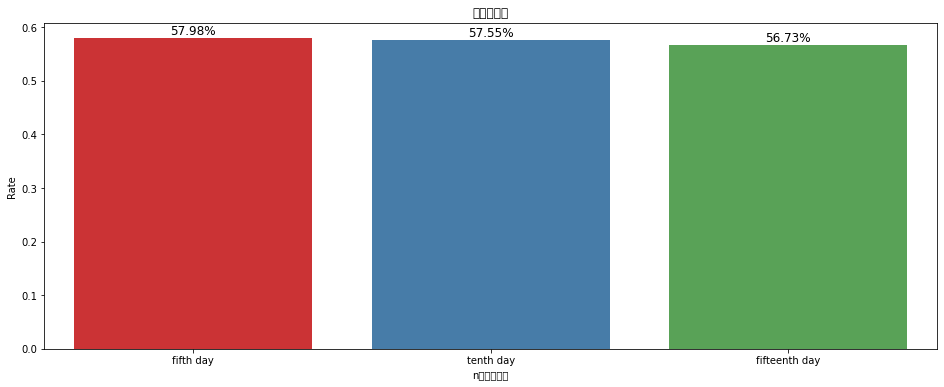

In [197]:
# 留存率可视化
 
fig, ax = plt.subplots(figsize=[16,6])
sns.barplot(x='n日后留存率',y='Rate', data=retention_rate,
            palette='Set1')
x=list(range(0,3))
for a,b in zip(x,retention_rate['Rate']):
    plt.text(a,b+0.001,'%.2f%%'% (b*100),ha='center', va='bottom',fontsize=12)
plt.title('用户留存率')


用户RFM价值分析


In [198]:
# RFM模型是衡量客户价值和客户创利能力的重要工具和手段。这三个要素构成了数据分析最好的指标：

# 最近一次消费(Recency)
# 消费频率(Frequency)
# 消费金额(Monetary)

In [202]:
buy_group= df[df['behavior_type'] =='buy'].groupby('user_id')['date']

In [200]:
#将2014-12-30作为每个用户最后一次购买时间来处理即现在时间
final_day=datetime.date(datetime.strptime('2014-12-30','%Y-%m-%d'))

In [203]:
# 距今购买间隔R

recent_buy_time = buy_group.apply(lambda x:final_day-x.max())
recent_buy_time = recent_buy_time.reset_index().rename(columns={'date':'recent'})
recent_buy_time['recent'] = recent_buy_time['recent'].map(lambda x:x.days)
recent_buy_time


,user_id,recent
0,7528,17
1,63348,19
2,79824,19
3,100539,27
4,109103,24
...,...,...
3450,142306361,12
3451,142337230,41
3452,142368840,21
3453,142412247,20


In [204]:
#购物频率F
buy_freq=buy_group.count().reset_index().rename(columns={'date':'freq'})
buy_freq

,user_id,freq
0,7528,2
1,63348,1
2,79824,1
3,100539,1
4,109103,1
...,...,...
3450,142306361,1
3451,142337230,1
3452,142368840,2
3453,142412247,2


In [205]:
#合并R、F
RFM=pd.merge(recent_buy_time,buy_freq,on='user_id')

In [208]:
# pd.qcut分箱
RFM['R'] = pd.qcut(RFM.recent,2,labels=['1','0'])
#天数小标签为1天数大标签为0
RFM['F'] = pd.qcut(RFM.freq.rank(method='first'),2,labels=['0','1'])
#频率大标签为1频率小标签为0
RFM


,user_id,recent,freq,R,F
0,7528,17,2,1,1
1,63348,19,1,1,0
2,79824,19,1,1,0
3,100539,27,1,0,0
4,109103,24,1,0,0
...,...,...,...,...,...
3450,142306361,12,1,1,1
3451,142337230,41,1,0,1
3452,142368840,21,2,1,1
3453,142412247,20,2,1,1


In [209]:
#RFM标签
RFM['RFM'] = RFM['R'].astype(int).map(str) + RFM['F'].astype(int).map(str)
RFM['RFM']

0       11
1       10
2       10
3       00
4       00
        ..
3450    11
3451    01
3452    11
3453    11
3454    11
Name: RFM, Length: 3455, dtype: object

In [210]:
dict_n={'01':'important customers',
        '11':'valuable customers',
        '10':'important regain customer',
        '00':'normal development customer'}
#用户标签
RFM['customer level'] = RFM['RFM'].map(dict_n)
RFM

,user_id,recent,freq,R,F,RFM,customer level
0,7528,17,2,1,1,11,valuable customers
1,63348,19,1,1,0,10,important regain customer
2,79824,19,1,1,0,10,important regain customer
3,100539,27,1,0,0,00,normal development customer
4,109103,24,1,0,0,00,normal development customer
...,...,...,...,...,...,...,...
3450,142306361,12,1,1,1,11,valuable customers
3451,142337230,41,1,0,1,01,important customers
3452,142368840,21,2,1,1,11,valuable customers
3453,142412247,20,2,1,1,11,valuable customers


Text(0.5, 1.0, 'RFM customer classification')

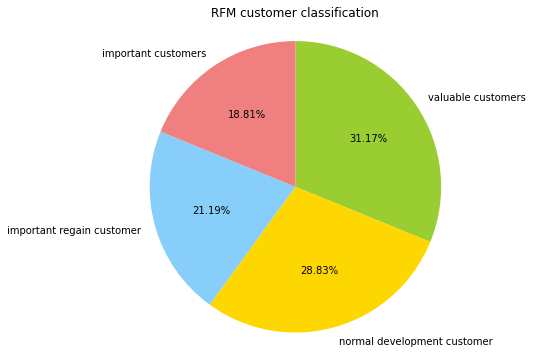

In [212]:
#饼状图
RFM_pie=RFM['customer level'].value_counts().reset_index()
RFM_pie['Rate'] = RFM_pie['customer level'] / RFM_pie['customer level'].sum()
fig, ax = plt.subplots(figsize=[16,6])
plt.pie(RFM_pie['Rate'],labels = RFM_pie['index'],startangle =90,autopct="%1.2f%%",
        counterclock=False,colors = ['yellowgreen','gold','lightskyblue','lightcoral'])
plt.axis('square')
plt.title('RFM customer classification')


In [ ]:
# 通过RFM模型对用户价值进行分类，对不同价值用户应采取不同的运营策略：

# 对于重要价值客户来说，要提高该部分用户的满意度，服务升级，发放特别福利，增大该部分用户留存率，在做运营推广时也要给与特别关注，避免引起用户反感。

# 对于重要保持客户，他们购物频次较高，但最近一段时间没有消费，可以推送相关其他商品，发放优惠卷、赠品和促销信息等，唤回该部分用户。

# 对于重要挽留客户，他们最近消费过，但购物频次较低，可以通过问卷有礼的方式找出其对平台的不满，提升购物体验，增大用户粘性。

# 对于一般发展客户，做到定期发送邮件或短信唤回，努力将其转化为重要保持客户或重要挽留客户。

# 商品分析

In [214]:
# 商品总数
df.item_id.nunique()

466621

In [221]:
# sku 下单量，，浏览量
# 1. 各个商品的下单量
item_num = df.groupby('item_id').behavior_type.value_counts().unstack().fillna(0).sort_values('buy',ascending=False)
item_num

behavior_type,buy,cart,collect,pv
item_id,,,,
198400340,4.0,0.0,2.0,13.0
165921998,4.0,0.0,0.0,4.0
378685775,3.0,0.0,0.0,3.0
220850771,3.0,0.0,0.0,0.0
44469739,3.0,0.0,0.0,2.0
...,...,...,...,...
136109857,0.0,0.0,0.0,1.0
136109357,0.0,0.0,0.0,1.0
136107265,0.0,0.0,0.0,1.0


No handles with labels found to put in legend.


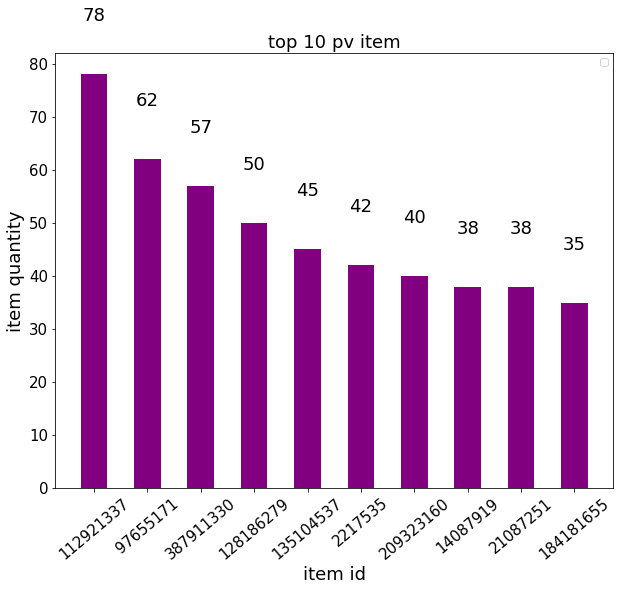

No handles with labels found to put in legend.


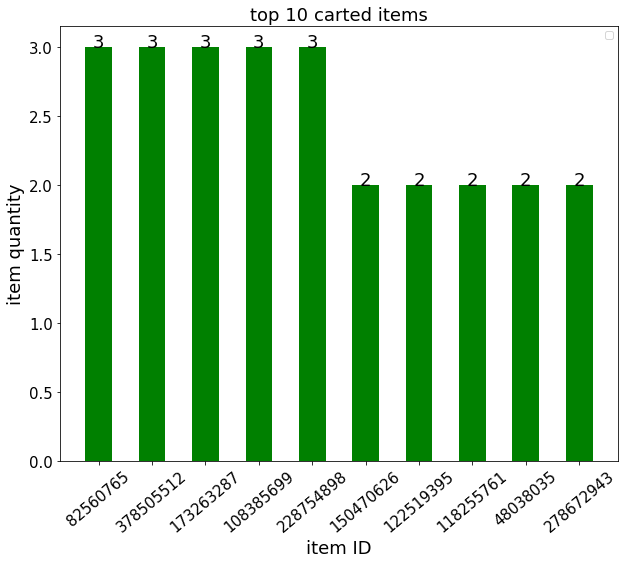

No handles with labels found to put in legend.
No handles with labels found to put in legend.


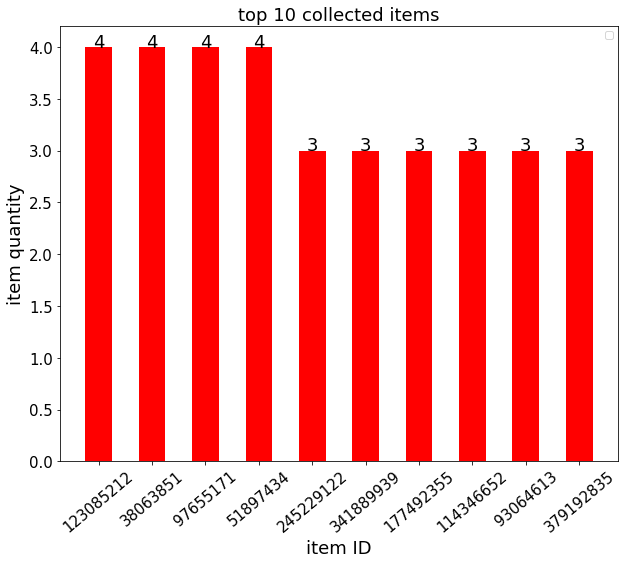

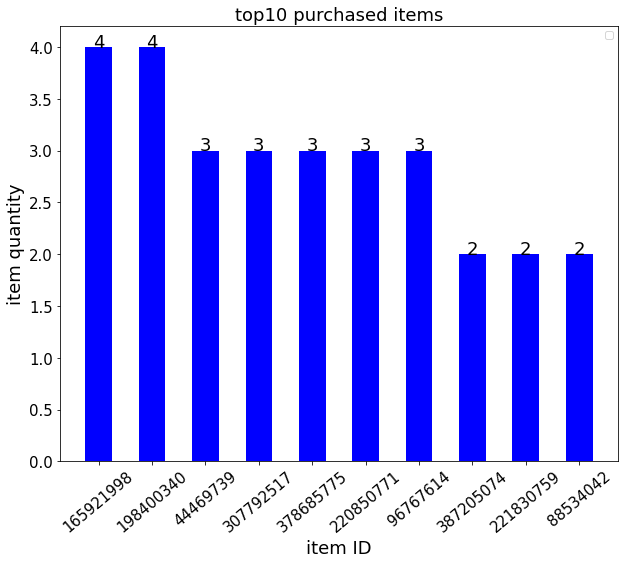

In [237]:
# 不同行为top10商品
plt.figure(figsize=(10,8))
product_1 = df[df.behavior_type=='pv']['item_id'].value_counts().head(10)
X = product_1.index
Y = product_1.values
plt.bar(range(len(X)), Y, tick_label=X, color='purple',width=0.5)
for x,y in enumerate(Y):
    plt.text(x,y+10,y, ha='center',fontsize=18)
font={'size':18,}
plt.ylabel('item quantity',font)
plt.xlabel('item id', font)
plt.xticks(fontsize=15, rotation=40)
plt.yticks(fontsize=15)
plt.legend()
plt.title('top 10 pv item', fontsize=18)
plt.show()


plt.figure(figsize=(10,8))
product_2= df[df.behavior_type == 'cart']['item_id'].value_counts().head(10)
X=product_2.index
Y=product_2.values
plt.bar(range(len(X)),Y,tick_label=X,color='g',width=0.5) 
for x,y in enumerate(Y):
    plt.text(x,y,y,ha='center',fontsize=18)
font={'size':18,}
plt.ylabel('item quantity',font)
plt.xlabel('item ID',font)
plt.xticks(fontsize=15,rotation=40)
plt.yticks(fontsize=15) 
plt.legend()
plt.title('top 10 carted items',fontsize=18)
plt.show()


plt.figure(figsize=(10,8))
product_3= df[df.behavior_type == 'collect']['item_id'].value_counts().head(10)
X=product_3.index
Y=product_3.values
plt.bar(range(len(X)),Y,tick_label=X,color='r',width=0.5) 
for x,y in enumerate(Y):
    plt.text(x,y,y,ha='center',fontsize=18)
font={'size':18,}
plt.ylabel('item quantity',font)
plt.xlabel('item ID',font)
plt.xticks(fontsize=15,rotation=40)
plt.yticks(fontsize=15) 
plt.legend()
plt.title('top 10 collected items',fontsize=18)

plt.figure(figsize=(10,8))
product_4= df[df.behavior_type == 'buy']['item_id'].value_counts().head(10)
X=product_4.index
Y=product_4.values
plt.bar(range(len(X)),Y,tick_label=X,color='b',width=0.5) 
for x,y in enumerate(Y):
    plt.text(x,y,y,ha='center',fontsize=18)
font={'size':18,}
plt.ylabel('item quantity',font)
plt.xlabel('item ID',font)
plt.xticks(fontsize=15, rotation=40)
plt.yticks(fontsize=15) 
plt.legend()
plt.title('top10 purchased items',fontsize=18)
plt.show()


In [252]:
# 商品种类分析

df.head()

,user_id,item_id,behavior_type,item_category,time,hour,weekday,date
9125647,110297710,355299199,pv,56,2014-11-19 20:00:00,20,2,2014-11-19
6241424,37844114,29685066,buy,9909,2014-11-29 09:00:00,9,5,2014-11-29
1282164,42719621,326606205,pv,10049,2014-12-06 23:00:00,23,5,2014-12-06
10386602,83813302,281220728,pv,5027,2014-12-17 09:00:00,9,2,2014-12-17
5968289,56245076,97710618,pv,1183,2014-12-15 08:00:00,8,0,2014-12-15


In [254]:
category = df.groupby('item_category').behavior_type.value_counts().unstack().fillna(0).sort_values('buy',ascending=False)

In [256]:
category['cate_pv_buy']= category['buy'] /category['pv']

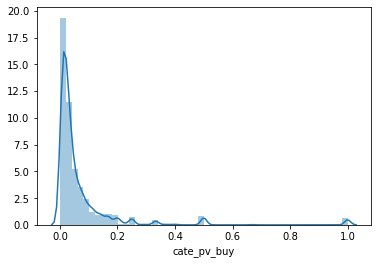

behavior_type,buy,cart,collect,pv,cate_pv_buy
item_category,,,,,
6344,109.0,68.0,193.0,4251.0,0.025641
1863,101.0,497.0,461.0,18505.0,0.005458
5232,65.0,115.0,241.0,6708.0,0.009690
5399,64.0,305.0,262.0,13541.0,0.004726
5894,55.0,371.0,321.0,15753.0,0.003491
7957,54.0,42.0,144.0,2068.0,0.026112
6977,52.0,7.0,97.0,1145.0,0.045415
5027,51.0,360.0,268.0,16077.0,0.003172
3424,51.0,46.0,76.0,2602.0,0.019600


In [257]:
sns.distplot(category[(category['cate_pv_buy'] <=1) & (category['cate_pv_buy'] > 0)]['cate_pv_buy'],kde=True)
plt.show()
category[(category['cate_pv_buy'] <=1) & (category['cate_pv_buy'] > 0)].head(10)

In [ ]:
# 然后从用户可能感兴趣的商品类目中推荐有比较性的具体商品，这样可以减少用户比较多个商品来回跳转的点击量，
# 能在更短的时间做出比较并选择需要购买的商品。

In [258]:
# pareto analysis

category['cumsum'] = category['buy'].cumsum()

key = category['buy'].sum()*0.8

category['class'] = category['cumsum'].map(lambda x: '80%' if x<=key else '20%')

category['class'].value_counts(1)

20%    0.912768
80%    0.087232
Name: class, dtype: float64

In [259]:
# 前80%销量有8%左右的商品品类提供，后20%的销量由92%左右的商品品类提供，接近二八定律所表示的由少数商品品类掌控了大部分的销量